# Final Project

In [106]:
import numpy as np
from skimage.transform import radon, iradon
import matplotlib.pyplot as plt
from skimage import io, util

Create the input image. The pixel values belong to the interval $[0,1]$. The higher the pixel value, the brighter the color.

In [107]:
input_image = 0.5*np.ones([100,100])
diag = len(np.diag(input_image))
input_image = np.pad(input_image, pad_width=diag+10)
input_image[0:50, 0:50] = 0.5


Compute the sinogram: <br />
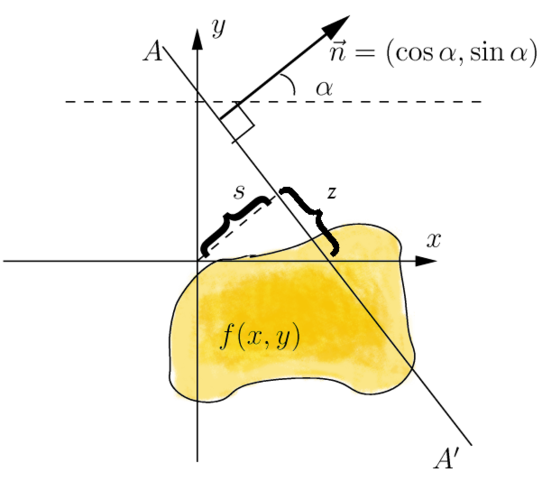

In [108]:
theta = np.linspace(0, 180, 180, endpoint=False)
sinogram = radon(input_image, theta=theta, circle=False)
regular_reconstructed_image = iradon(sinogram, theta=theta, circle=False)

Plot the regular reconstruction:

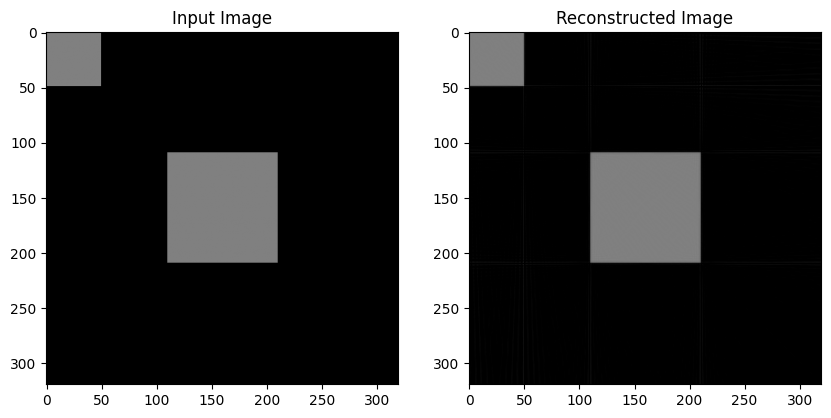

In [109]:
plt.figure(figsize=(10, 10)) 
plt.subplot(121)
plt.title('Input Image')
plt.imshow(input_image, vmin=0, vmax=1, cmap='gray')
plt.subplot(122)
plt.title('Reconstructed Image')
plt.imshow(regular_reconstructed_image, vmin = 0, vmax = 1, cmap='gray')
plt.show()

Analyze the error:

L1 average error: 0.006144588860171216


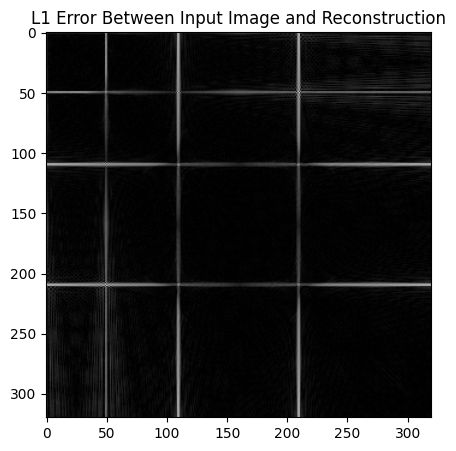

In [110]:
def AnalyzeError(input_image, reconstructed_image, title):
    L1_error = np.abs(input_image - reconstructed_image)
    plt.figure(figsize=(5, 5)) 
    plt.title(title)
    plt.imshow(L1_error, cmap='gray')
    print("L1 average error:", np.average(L1_error))

AnalyzeError(input_image, regular_reconstructed_image, "L1 Error Between Input Image and Reconstruction")

Add noise to the sinogram. </br>
The noise at each point in the sinogram domain is taken from a normal distrubution:
$$
\text{Noise} \sim \mathcal{N}(\mu = 0, \sigma = 8)
$$

In [111]:
noise = np.random.normal(loc = 0, scale = 8, size=sinogram.shape)
noisy_sinogram = sinogram + noise

Invert the Radon transform to reconstruct the image:

In [112]:

reconstructed_image = iradon(noisy_sinogram, theta=theta, circle=False)

Plot the results: </br>
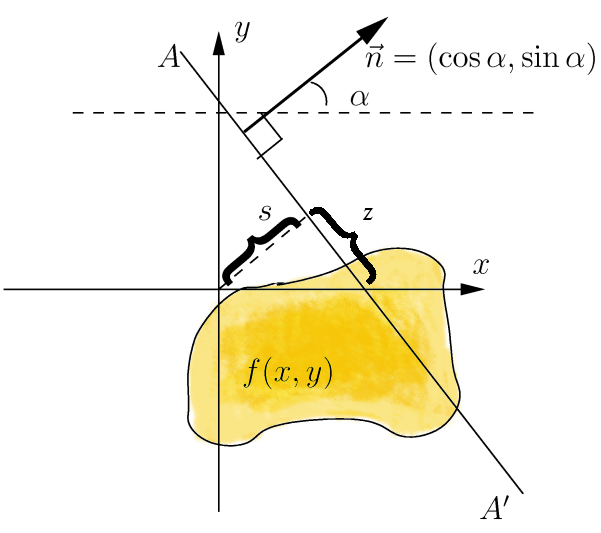

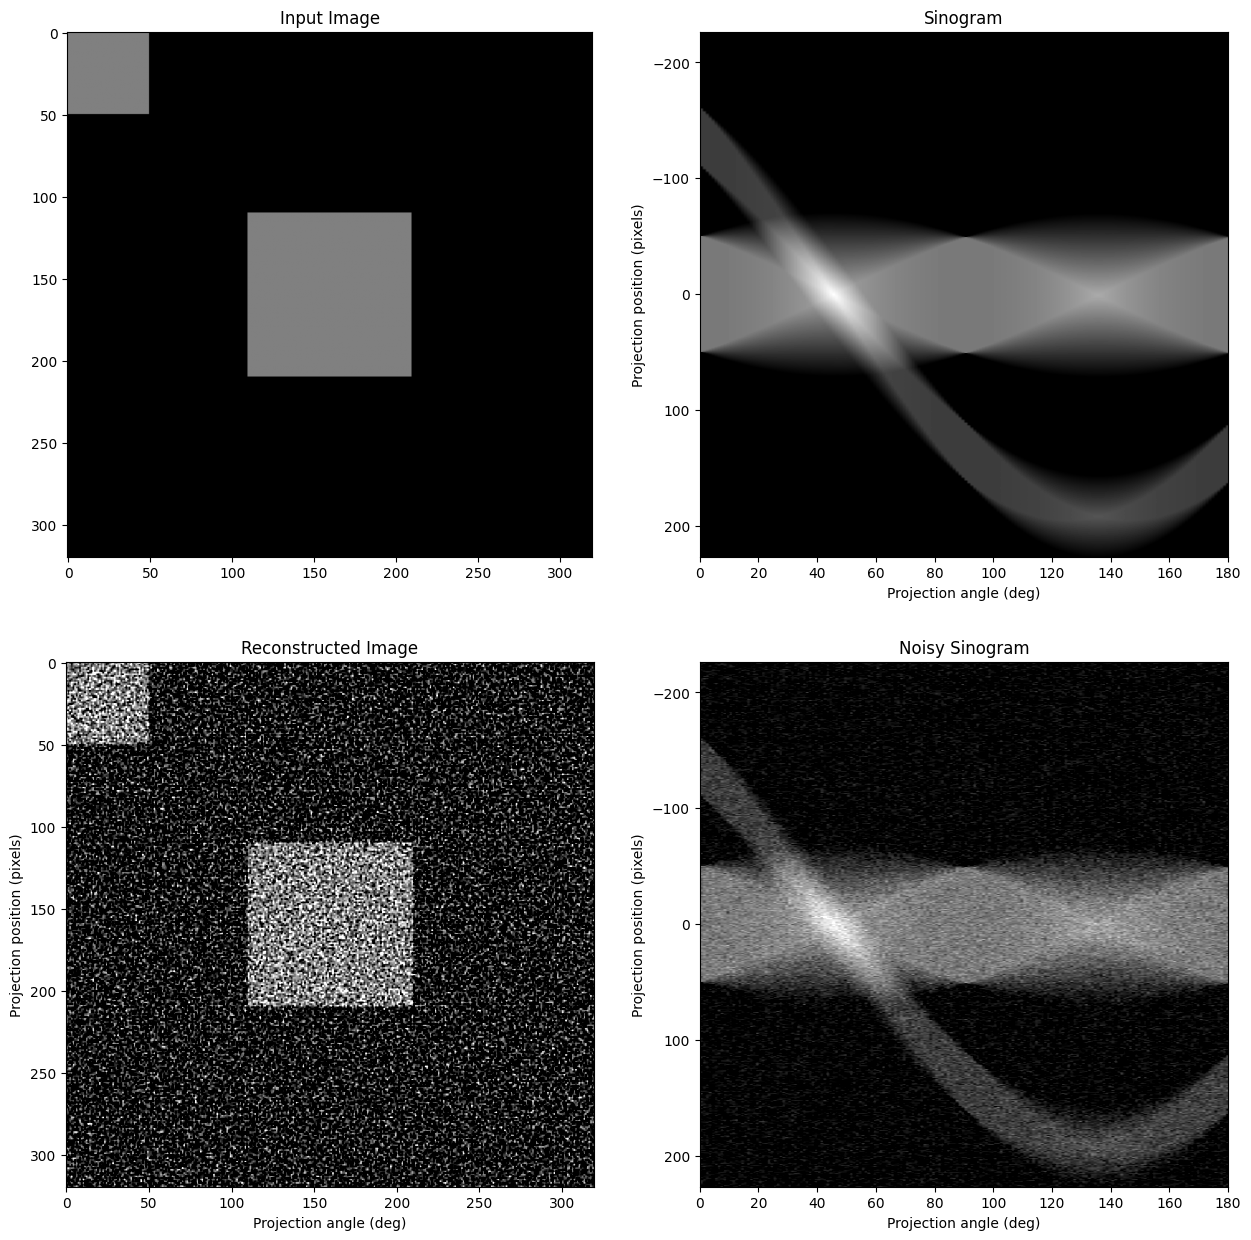

In [113]:
def PlotAll(input_image, sinogram, reconstructed_image, noisy_sinogram):
    plt.figure(figsize=(15, 15)) 
    plt.subplot(221)
    plt.title('Input Image')
    plt.imshow(input_image, vmin=0, vmax=1, cmap='gray')
    plt.subplot(222)
    plt.title('Sinogram')
    plt.xlabel("Projection angle (deg)")
    plt.ylabel("Projection position (pixels)")
    plt.imshow(sinogram, cmap='gray', aspect='auto',
                    extent=(0, 180, sinogram.shape[0]/2.0, -sinogram.shape[0]/2.0))
    plt.subplot(223)
    plt.title('Reconstructed Image')
    plt.xlabel("Projection angle (deg)")
    plt.ylabel("Projection position (pixels)")
    plt.imshow(reconstructed_image, vmin=0, vmax=1, cmap='gray', aspect = 'auto')
    plt.subplot(224)
    plt.title('Noisy Sinogram')
    plt.xlabel("Projection angle (deg)")
    plt.ylabel("Projection position (pixels)")
    plt.imshow(noisy_sinogram, cmap='gray', aspect='auto', vmin=np.min(sinogram), vmax=np.max(sinogram),
                    extent=(0, 180, noisy_sinogram.shape[0]/2.0, -noisy_sinogram.shape[0]/2.0))
    plt.show()

PlotAll(input_image, sinogram, reconstructed_image, noisy_sinogram)

Analyze the error again:

L1 average error: 0.2951445014355474


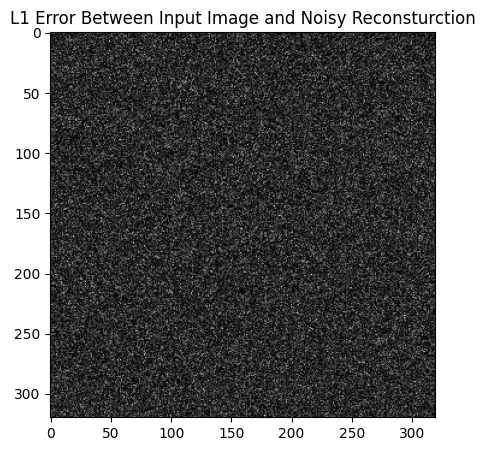

In [114]:
AnalyzeError(input_image, reconstructed_image, "L1 Error Between Input Image and Noisy Reconsturction")

Change the radon data over a region disjoint from the upper-left square

In [115]:
sinogram.shape
noisy_sinogram = sinogram.copy()
temp = noisy_sinogram[noisy_sinogram.shape[0]//2 - 50: noisy_sinogram.shape[0]//2 + 50,int(110 / 180 * noisy_sinogram.shape[1]): int(160 / 180 * noisy_sinogram.shape[1])]
temp += np.random.normal(loc = 0, scale = 8, size=temp.shape)

Invert the Radon data again:

In [116]:
reconstructed_image = iradon(noisy_sinogram, theta=theta, circle=False)

Plot the results again:

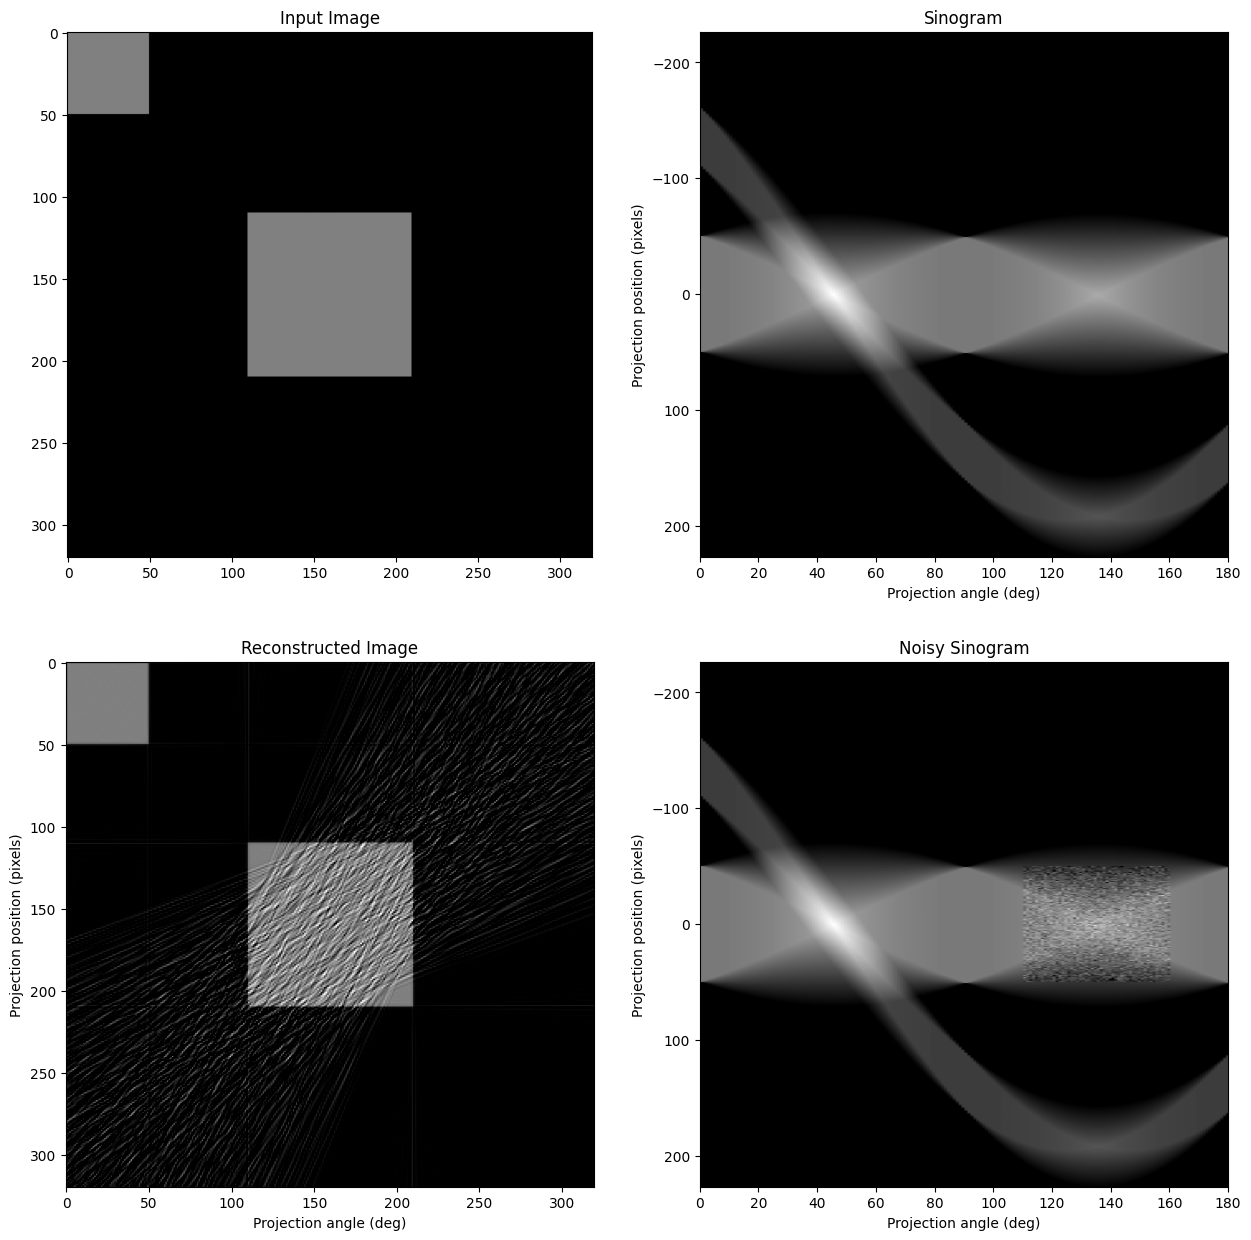

[]

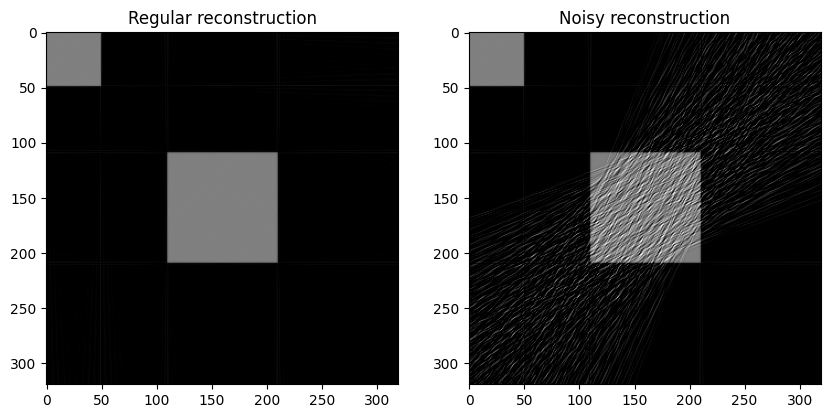

In [117]:
PlotAll(input_image, sinogram, reconstructed_image, noisy_sinogram)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('Regular reconstruction')
plt.imshow(regular_reconstructed_image, vmin=0, vmax=1, cmap='gray')
plt.subplot(122)
plt.title('Noisy reconstruction')
plt.imshow(reconstructed_image, vmin=0, vmax=1, cmap='gray')
plt.plot()

Analyze the error over the upper left square:

L1 average error: 0.0016986236477235898


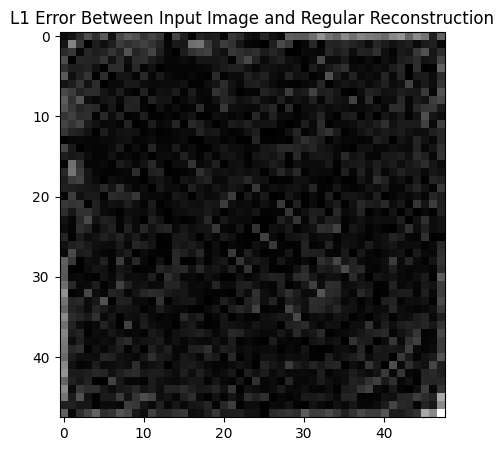

In [118]:
AnalyzeError(input_image[1:49,1:49], reconstructed_image[1:49,1:49], "L1 Error Between Input Image and Regular Reconstruction")

L1 average error: 2.395300674674962e-05


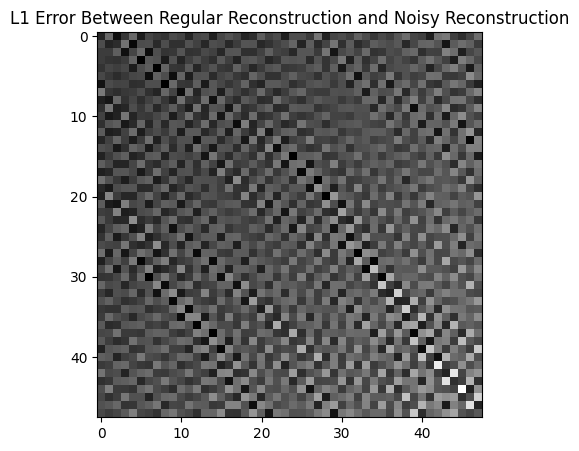

In [119]:
AnalyzeError(regular_reconstructed_image[1:49,1:49], reconstructed_image[1:49,1:49], "L1 Error Between Regular Reconstruction and Noisy Reconstruction")

L1 average error: 0.0016986236477235898


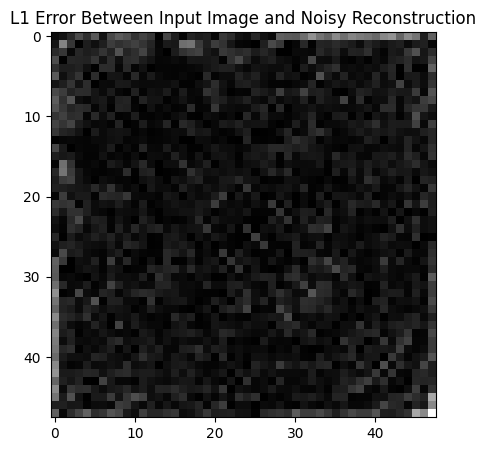

In [120]:
AnalyzeError(input_image[1:49,1:49], reconstructed_image[1:49,1:49], "L1 Error Between Input Image and Noisy Reconstruction")